# [GaitDB Dataset](https://www.physionet.org/content/gaitdb/1.0.0/)

## Data Description

Walking stride interval time series included are from 15 subjects: 5 healthy young adults (23 - 29 years old), 5 healthy old adults (71 - 77 years old), and 5 older adults (60 - 77 years old) with Parkinson's disease. The file name indicates old (o), young (y) or Parkinson's disease (pd). For the old and young subjects, the age (in years) is also included in the filename.

Subjects walked continuously on level ground around an obstacle-free path. The stride interval was measured using ultra-thin, force sensitive resistors placed inside the shoe. The analog force signal was sampled at 300 Hz with a 12 bit A/D converter, using an ambulatory, ankle-worn microcomputer that also recorded the data. Subsequently, the time between foot-strikes was automatically computed. The method for determining the stride interval is a modification of a previously validated method that has been shown to agree with force-platform measures, a “gold” standard.

Data were collected from the healthy subjects as they walked in a roughly circular path for 15 minutes, and from the subjects with Parkinson’s disease as they walked for 6 minutes up and down a long hallway.

## Set-Up and Imports

In [1]:
%load_ext autoreload
%autoreload 2
# to ensure kernel resets when files change around it

In [2]:
from forest import * # basically lazy imports everything we need to care about
import np # main library for numeric calculations
# import pandas as pd - main library for data analysis
# import matplotlib.pyplot as plt - main library for data plotting
from glob import glob # check files
from math import *
# import scipy as sp - STEM software
# from scipy import signal

"""
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)"""

warnings.filterwarnings('ignore') # literally to ignore all the warnings that don't matter

%matplotlib inline
# to place plotting inside the diagram

## Get Data

In [3]:
gaitdb = []
gaitDBnames = []
for i in sorted(glob("gaitdb/*.txt")):
    gaitDBnames.append(i.split("\\")[-1])
    gaitdb.append(pd.read_csv(i, sep="\t", names=["time", "stride_time"]))

gaitdb[0]

,time,stride_time
0,30.797,1.023
1,31.820,1.030
2,32.850,1.017
3,33.867,1.027
4,34.893,1.043
...,...,...
810,865.780,0.997
811,866.777,0.993
812,867.770,1.007
813,868.777,1.013


## Plotting Initial Data

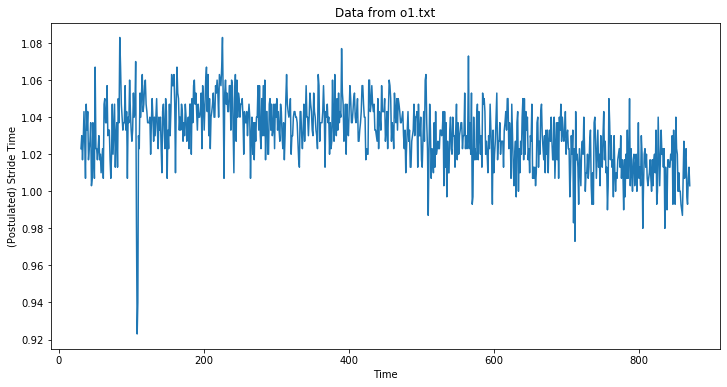

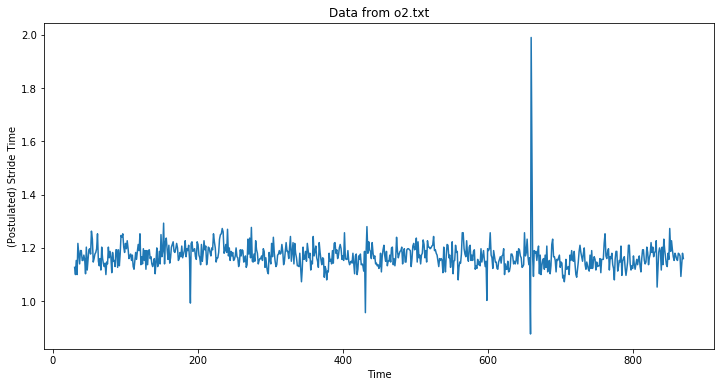

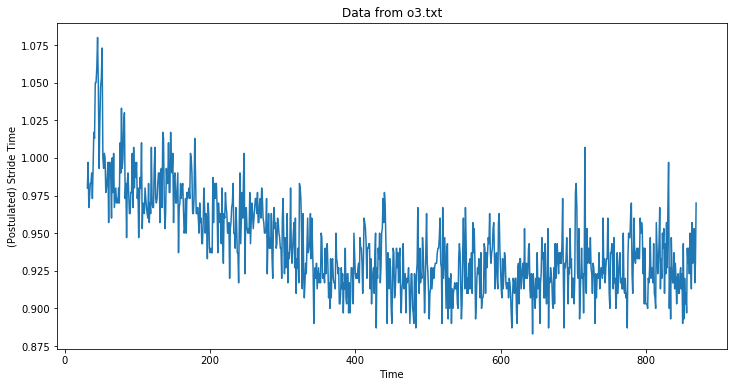

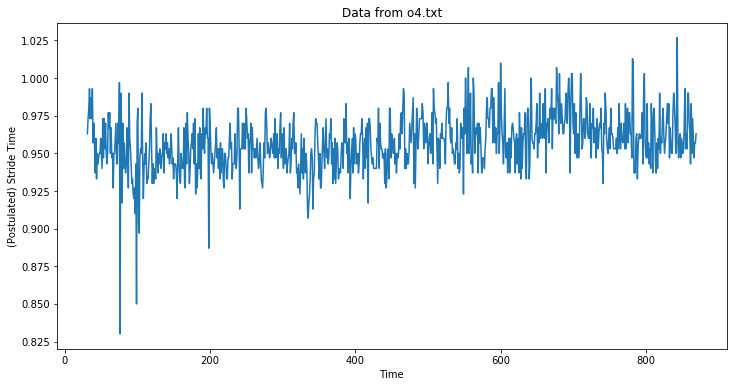

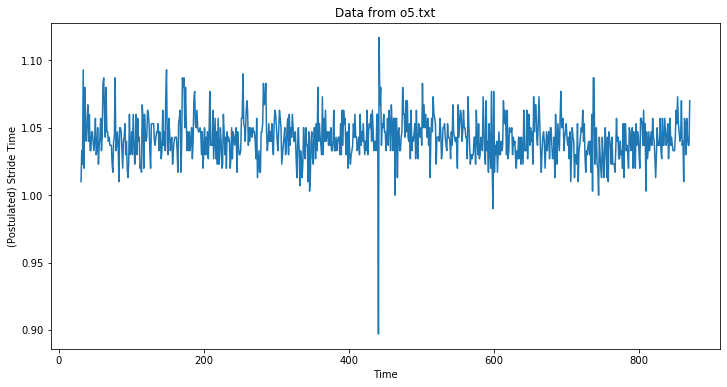

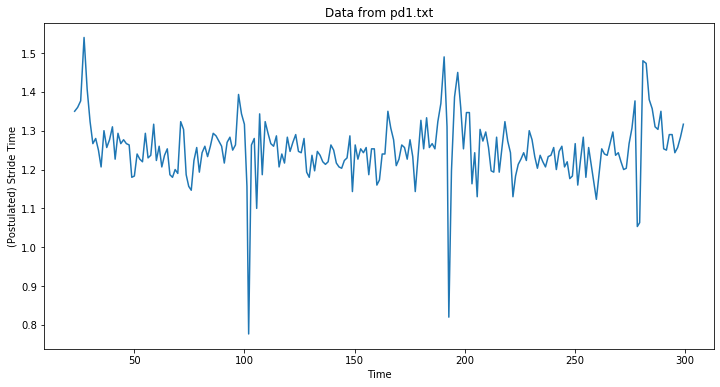

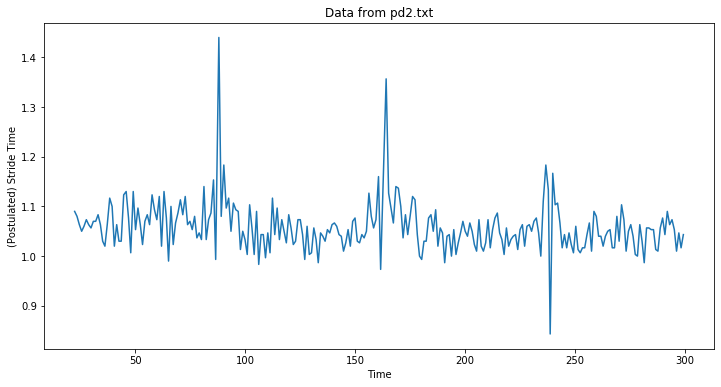

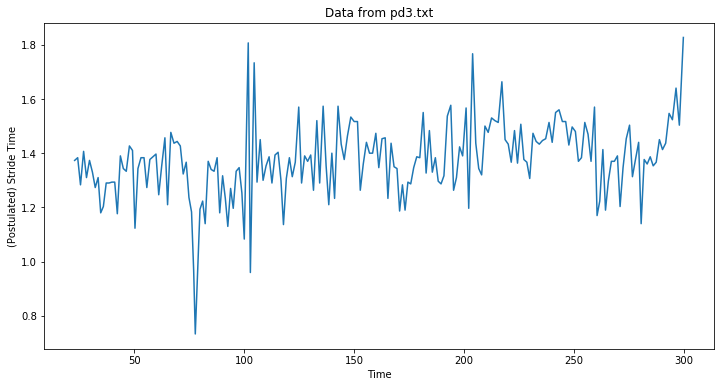

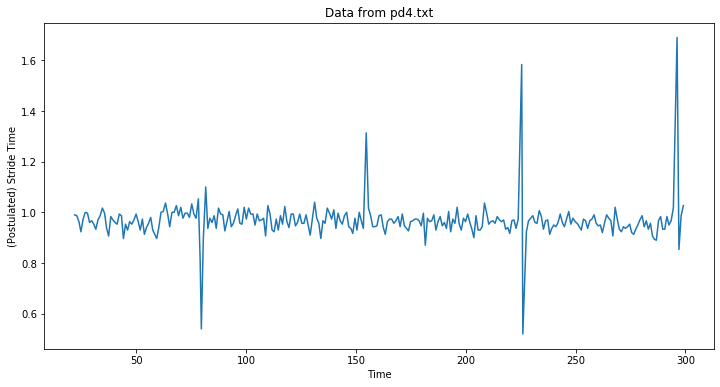

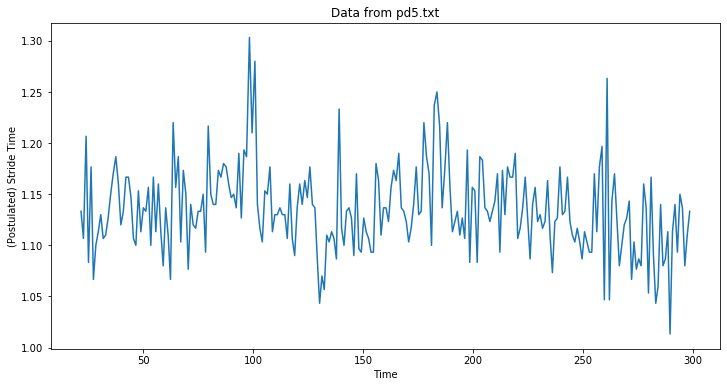

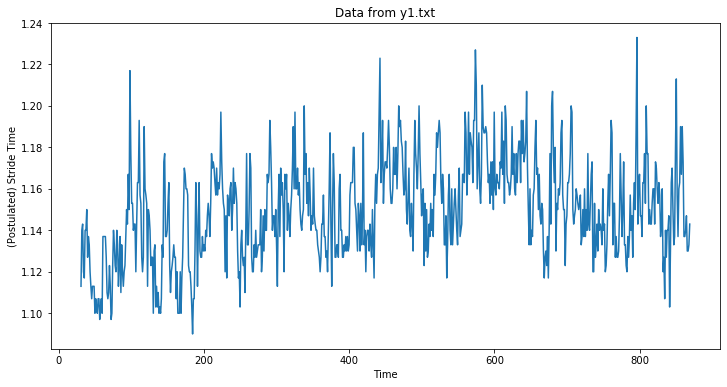

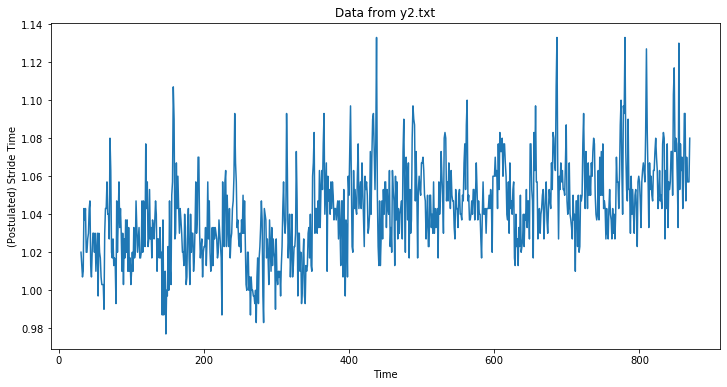

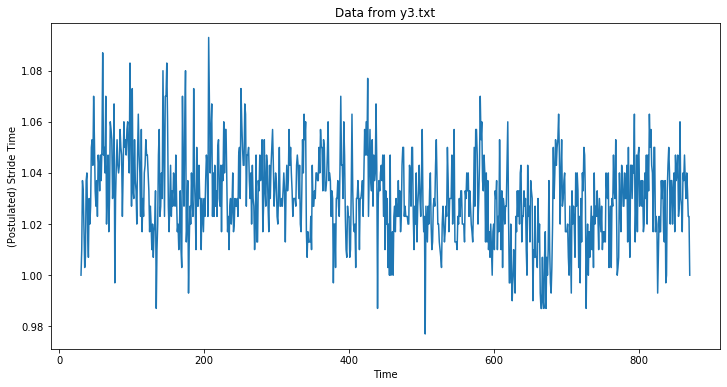

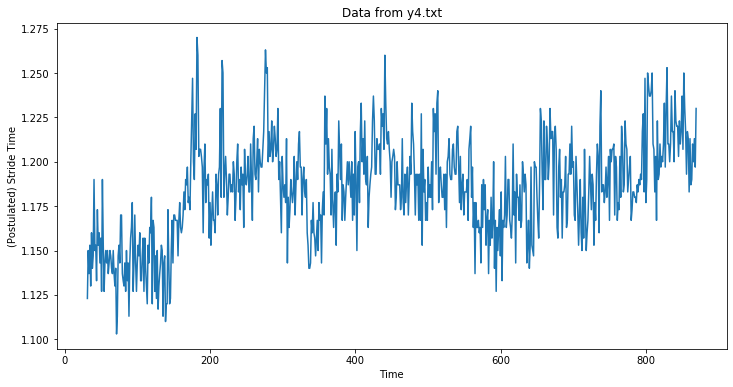

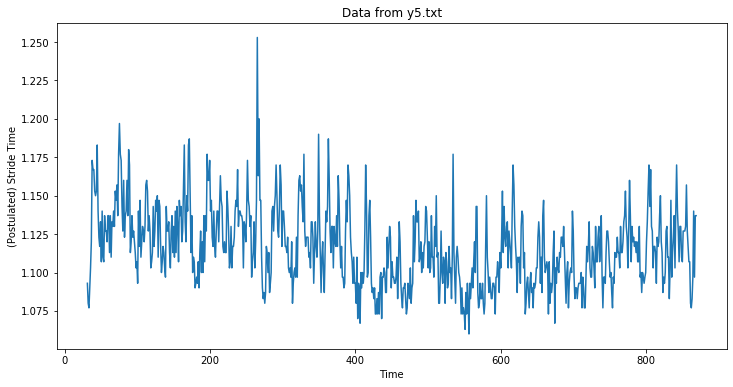

In [4]:
for i in range(len(gaitdb)):
    plt.figure(figsize=(12, 6))
    plt.plot(gaitdb[i]["time"], gaitdb[i]["stride_time"])
    plt.title("Data from "+gaitDBnames[i])
    plt.ylabel("(Postulated) Stride Time")
    plt.xlabel("Time")
    plt.show()

## Variance-based Analysis

In [5]:
variances = []
for i in range(15):
    var = gaitdb[i].var()["stride_time"]
    print(gaitDBnames[i][:-5]+":", var)
    variances.append(var)

o: 0.0003150203102154013
o: 0.0025416611883789233
o: 0.0009108964281580096
o: 0.00033811834137756824
o: 0.0002692188292773129
pd: 0.006372048896702135
pd: 0.00254124891039967
pd: 0.0197283147651563
pd: 0.006288075749128922
pd: 0.0017474187480762782
y: 0.0005700363342540924
y: 0.0005673018078695489
y: 0.0002956847106940924
y: 0.0007965643741085166
y: 0.0006283753293481047


### Plotting Variance Data

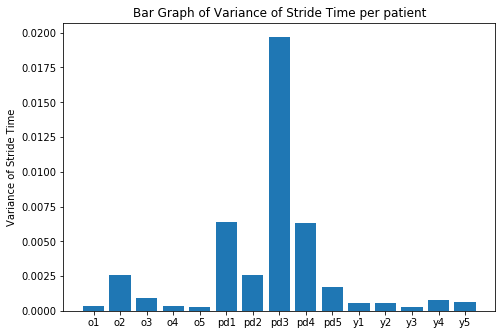

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Variance of Stride Time")
ax.set_title("Bar Graph of Variance of Stride Time per patient")
ax.bar([i[:-4] for i in gaitDBnames], variances)
plt.show()

### Logistic Regression
#### Logistic Regression Data Preparation

In [7]:
X = np.array([[1]*15, variances])
Y = np.array([0]*5 + [1]*5 + [0]*5)[np.newaxis].T
theta = np.array([0, 1])
m = 15

#### Logistic Regression Functions

In [8]:
def sigmoid(z):
    return 1/(1 + np.exp(-z));

def logReg(iterations=50):
    global theta
    alpha = 10
    J = float("inf")
    for i in range(iterations):
        h = sigmoid(theta @ X)[np.newaxis].T
        J_temp = (-Y.T @ np.log(h)) - ((1 - Y).T @ np.log(1 - h))
        if isnan(J_temp) or isinf(J_temp): break
        elif J_temp > J: print(J_temp)
        J = J_temp
        theta = theta - alpha/m * (X @ (h - Y)).T[0]
    print(theta)


#### Logistic Regression Brute Force

In [10]:
logReg(5000000) # tried twice

[  -4.50241442 2090.35672887]


## Testing Validity

In [11]:
theta0, theta1 = tuple(theta)
for i in range(15):
    print(gaitDBnames[i][:-5]+":", sigmoid(theta0 + theta1*variances[i]))

h = sigmoid(theta @ X)
np.round(h)

o: 0.020960965456681777
o: 0.6922297080275551
o: 0.06924688221484637
o: 0.021975071354770264
o: 0.019083728829316665
pd: 0.9998518949865342
pd: 0.6920460713603303
pd: 1.0
pd: 0.999823481270244
pd: 0.2994987554473062
y: 0.03520134528144031
y: 0.03500772762026932
y: 0.020147380465463514
y: 0.05534096091562478
y: 0.03958611787942368


array([0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])

## Final Plots

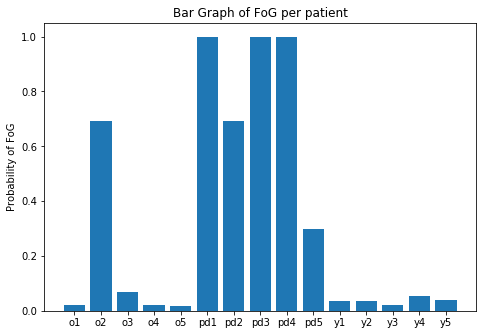

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Probability of FoG")
ax.set_title("Bar Graph of FoG per patient")
ax.bar([i[:-4] for i in gaitDBnames], h)
plt.show()

## Precision, Recall, Accuracy and F1 Scores
precision = tp/(tp+fp)

recall = tp/(tp+fn)

specificity = tn/(tn+fp)

accuracy = (tp+tn)/15

f1 = 2(recall)(precision)/(recall+precision)

In [13]:
Y.T[0] == np.round(h)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True])

In [14]:
accuracy = sum(Y.T[0] == np.round(h))/m
accuracy

0.8666666666666667

In [15]:
preds = np.round(h)
actuals = Y.T[0]
tp = fp = tn = fn = 0
for i in range(m):
    actual = actuals[i]
    pred = preds[i]
    if actual == 1 and pred == 1: tp += 1
    elif actual == 0 and pred == 1: fp += 1
    elif actual == 0 and pred == 0: tn += 1
    else: fn += 1

print(tp, fp, tn, fn)

4 1 9 1


In [16]:
precision = tp/(tp+fp)
precision

0.8

In [17]:
recall = tp/(tp+fn)
recall

0.8

In [18]:
specificity = tn/(tn+fp)
specificity

0.9

In [19]:
f1 = 2*(recall)*(precision)/(recall+precision)
round(f1, 1)

0.8

| Precision | Recall | Specificity | Accuracy | F1 Score |
| --- | --- | --- | --- | --- |
| 0.80 | 0.80 | 0.90 | 0.867 | 0.80 |